In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()


In [3]:
X = data.data
y = data.target

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

y = pd.get_dummies(y1).values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) 

# Building the network

In [6]:
import keras
from keras.optimizers import SGD
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint


def generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate):
    model = Sequential()
    model.add(Dense(units=hidden_nodes,
                    kernel_initializer=keras.initializers.RandomUniform(-1, 1),
                    activation='sigmoid',
                    input_dim=input_nodes))
    model.add(Dense(units=output_nodes, activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learning_rate, momentum=0.9, nesterov=True),
                  metrics=['accuracy']                  
                 )
    
    return model

Using TensorFlow backend.


In [7]:
import os
import shutil

dir = '/home/ricardo/mestrado/models/'
if os.path.exists(dir):
    shutil.rmtree(dir)
os.mkdir(dir)

epochs = 1000
learning_rate = 0.0001
hidden_nodes = 60
input_nodes = X_train.shape[1]
output_nodes = y_train.shape[1]

model = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)

save_model_checkpoint = ModelCheckpoint(dir + 'weights.{epoch:04d}-{val_loss:.5f}-{val_acc:.5f}.hdf5',
                                            verbose=0, 
                                            save_best_only=False,                                           
                                            save_weights_only=False,
                                            mode='auto',                                           
                                            period=1)

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_test, y_test),
                    epochs=epochs,
                    callbacks=[save_model_checkpoint]
                   )

Train on 455 samples, validate on 114 samples
Epoch 1/1000
455/455 [==============================] - 0s 530us/step - loss: 0.7822 - acc: 0.6264 - val_loss: 0.7667 - val_acc: 0.6316
Epoch 2/1000
455/455 [==============================] - 0s 75us/step - loss: 0.7607 - acc: 0.6264 - val_loss: 0.7481 - val_acc: 0.6316
Epoch 3/1000
455/455 [==============================] - 0s 68us/step - loss: 0.7364 - acc: 0.6264 - val_loss: 0.7338 - val_acc: 0.6316
Epoch 4/1000
455/455 [==============================] - 0s 116us/step - loss: 0.7203 - acc: 0.6264 - val_loss: 0.7178 - val_acc: 0.6316
Epoch 5/1000
455/455 [==============================] - 0s 118us/step - loss: 0.7082 - acc: 0.6264 - val_loss: 0.7027 - val_acc: 0.6316
Epoch 6/1000
455/455 [==============================] - 0s 94us/step - loss: 0.6975 - acc: 0.6264 - val_loss: 0.6863 - val_acc: 0.6316
Epoch 7/1000
455/455 [==============================] - 0s 80us/step - loss: 0.6864 - acc: 0.6264 - val_loss: 0.6767 - val_acc: 0.6316
Epoch 

Epoch 61/1000
455/455 [==============================] - 0s 79us/step - loss: 0.5372 - acc: 0.8527 - val_loss: 0.5437 - val_acc: 0.8246
Epoch 62/1000
455/455 [==============================] - 0s 57us/step - loss: 0.5346 - acc: 0.8703 - val_loss: 0.5418 - val_acc: 0.8421
Epoch 63/1000
455/455 [==============================] - 0s 74us/step - loss: 0.5331 - acc: 0.8681 - val_loss: 0.5403 - val_acc: 0.8246
Epoch 64/1000
455/455 [==============================] - 0s 73us/step - loss: 0.5324 - acc: 0.8615 - val_loss: 0.5393 - val_acc: 0.8246
Epoch 65/1000
455/455 [==============================] - 0s 72us/step - loss: 0.5304 - acc: 0.8637 - val_loss: 0.5376 - val_acc: 0.8333
Epoch 66/1000
455/455 [==============================] - 0s 87us/step - loss: 0.5295 - acc: 0.8725 - val_loss: 0.5372 - val_acc: 0.8421
Epoch 67/1000
455/455 [==============================] - 0s 57us/step - loss: 0.5277 - acc: 0.8681 - val_loss: 0.5354 - val_acc: 0.8333
Epoch 68/1000
455/455 [=========================

455/455 [==============================] - 0s 61us/step - loss: 0.4707 - acc: 0.8967 - val_loss: 0.4821 - val_acc: 0.8772
Epoch 122/1000
455/455 [==============================] - 0s 84us/step - loss: 0.4689 - acc: 0.8967 - val_loss: 0.4819 - val_acc: 0.8684
Epoch 123/1000
455/455 [==============================] - 0s 60us/step - loss: 0.4683 - acc: 0.8945 - val_loss: 0.4810 - val_acc: 0.8772
Epoch 124/1000
455/455 [==============================] - 0s 94us/step - loss: 0.4671 - acc: 0.8967 - val_loss: 0.4776 - val_acc: 0.8772
Epoch 125/1000
455/455 [==============================] - 0s 81us/step - loss: 0.4666 - acc: 0.8923 - val_loss: 0.4803 - val_acc: 0.8772
Epoch 126/1000
455/455 [==============================] - 0s 82us/step - loss: 0.4643 - acc: 0.9011 - val_loss: 0.4764 - val_acc: 0.8772
Epoch 127/1000
455/455 [==============================] - 0s 122us/step - loss: 0.4646 - acc: 0.8945 - val_loss: 0.4768 - val_acc: 0.8772
Epoch 128/1000
455/455 [==============================]

Epoch 181/1000
455/455 [==============================] - 0s 67us/step - loss: 0.3964 - acc: 0.8989 - val_loss: 0.4169 - val_acc: 0.8772
Epoch 182/1000
455/455 [==============================] - 0s 75us/step - loss: 0.3994 - acc: 0.9011 - val_loss: 0.4146 - val_acc: 0.8684
Epoch 183/1000
455/455 [==============================] - 0s 83us/step - loss: 0.4049 - acc: 0.8967 - val_loss: 0.4116 - val_acc: 0.8772
Epoch 184/1000
455/455 [==============================] - 0s 79us/step - loss: 0.4019 - acc: 0.9033 - val_loss: 0.4171 - val_acc: 0.8684
Epoch 185/1000
455/455 [==============================] - 0s 82us/step - loss: 0.3973 - acc: 0.8967 - val_loss: 0.4126 - val_acc: 0.8684
Epoch 186/1000
455/455 [==============================] - 0s 79us/step - loss: 0.3947 - acc: 0.8967 - val_loss: 0.4124 - val_acc: 0.8860
Epoch 187/1000
455/455 [==============================] - 0s 79us/step - loss: 0.3924 - acc: 0.9033 - val_loss: 0.4117 - val_acc: 0.8772
Epoch 188/1000
455/455 [=================

Epoch 241/1000
455/455 [==============================] - 0s 65us/step - loss: 0.3669 - acc: 0.8967 - val_loss: 0.3836 - val_acc: 0.8684
Epoch 242/1000
455/455 [==============================] - 0s 74us/step - loss: 0.3655 - acc: 0.9033 - val_loss: 0.3827 - val_acc: 0.8772
Epoch 243/1000
455/455 [==============================] - 0s 76us/step - loss: 0.3647 - acc: 0.9011 - val_loss: 0.3821 - val_acc: 0.8772
Epoch 244/1000
455/455 [==============================] - 0s 58us/step - loss: 0.3609 - acc: 0.9011 - val_loss: 0.3822 - val_acc: 0.8860
Epoch 245/1000
455/455 [==============================] - 0s 56us/step - loss: 0.3609 - acc: 0.9033 - val_loss: 0.3826 - val_acc: 0.8860
Epoch 246/1000
455/455 [==============================] - 0s 77us/step - loss: 0.3593 - acc: 0.9033 - val_loss: 0.3814 - val_acc: 0.8860
Epoch 247/1000
455/455 [==============================] - 0s 56us/step - loss: 0.3587 - acc: 0.9011 - val_loss: 0.3795 - val_acc: 0.8860
Epoch 248/1000
455/455 [=================

Epoch 301/1000
455/455 [==============================] - 0s 105us/step - loss: 0.3391 - acc: 0.9055 - val_loss: 0.3698 - val_acc: 0.8860
Epoch 302/1000
455/455 [==============================] - 0s 75us/step - loss: 0.3409 - acc: 0.9033 - val_loss: 0.3667 - val_acc: 0.8860
Epoch 303/1000
455/455 [==============================] - 0s 97us/step - loss: 0.3402 - acc: 0.9011 - val_loss: 0.3661 - val_acc: 0.8860
Epoch 304/1000
455/455 [==============================] - 0s 105us/step - loss: 0.3377 - acc: 0.9033 - val_loss: 0.3675 - val_acc: 0.8860
Epoch 305/1000
455/455 [==============================] - 0s 85us/step - loss: 0.3387 - acc: 0.9033 - val_loss: 0.3647 - val_acc: 0.8860
Epoch 306/1000
455/455 [==============================] - 0s 120us/step - loss: 0.3386 - acc: 0.9033 - val_loss: 0.3684 - val_acc: 0.8860
Epoch 307/1000
455/455 [==============================] - 0s 84us/step - loss: 0.3388 - acc: 0.9033 - val_loss: 0.3597 - val_acc: 0.8772
Epoch 308/1000
455/455 [==============

455/455 [==============================] - 0s 79us/step - loss: 0.3228 - acc: 0.9033 - val_loss: 0.3589 - val_acc: 0.8947
Epoch 361/1000
455/455 [==============================] - 0s 93us/step - loss: 0.3247 - acc: 0.9033 - val_loss: 0.3545 - val_acc: 0.8860
Epoch 362/1000
455/455 [==============================] - 0s 80us/step - loss: 0.3235 - acc: 0.9033 - val_loss: 0.3505 - val_acc: 0.8860
Epoch 363/1000
455/455 [==============================] - 0s 82us/step - loss: 0.3251 - acc: 0.9033 - val_loss: 0.3489 - val_acc: 0.8860
Epoch 364/1000
455/455 [==============================] - 0s 88us/step - loss: 0.3246 - acc: 0.9055 - val_loss: 0.3524 - val_acc: 0.8947
Epoch 365/1000
455/455 [==============================] - 0s 79us/step - loss: 0.3241 - acc: 0.9055 - val_loss: 0.3514 - val_acc: 0.8860
Epoch 366/1000
455/455 [==============================] - 0s 72us/step - loss: 0.3220 - acc: 0.9033 - val_loss: 0.3526 - val_acc: 0.8860
Epoch 367/1000
455/455 [==============================] 

Epoch 420/1000
455/455 [==============================] - 0s 54us/step - loss: 0.3257 - acc: 0.9077 - val_loss: 0.3382 - val_acc: 0.8860
Epoch 421/1000
455/455 [==============================] - 0s 75us/step - loss: 0.3263 - acc: 0.9033 - val_loss: 0.3252 - val_acc: 0.8860
Epoch 422/1000
455/455 [==============================] - 0s 62us/step - loss: 0.3185 - acc: 0.9033 - val_loss: 0.3300 - val_acc: 0.8772
Epoch 423/1000
455/455 [==============================] - 0s 104us/step - loss: 0.3167 - acc: 0.8989 - val_loss: 0.3258 - val_acc: 0.8860
Epoch 424/1000
455/455 [==============================] - 0s 114us/step - loss: 0.3276 - acc: 0.9077 - val_loss: 0.3290 - val_acc: 0.8860
Epoch 425/1000
455/455 [==============================] - 0s 82us/step - loss: 0.3139 - acc: 0.9055 - val_loss: 0.3330 - val_acc: 0.8772
Epoch 426/1000
455/455 [==============================] - 0s 89us/step - loss: 0.3133 - acc: 0.9055 - val_loss: 0.3173 - val_acc: 0.8772
Epoch 427/1000
455/455 [===============

Epoch 480/1000
455/455 [==============================] - 0s 103us/step - loss: 0.3011 - acc: 0.9033 - val_loss: 0.3298 - val_acc: 0.8860
Epoch 481/1000
455/455 [==============================] - 0s 98us/step - loss: 0.3009 - acc: 0.9077 - val_loss: 0.3285 - val_acc: 0.8772
Epoch 482/1000
455/455 [==============================] - 0s 84us/step - loss: 0.3056 - acc: 0.9011 - val_loss: 0.3119 - val_acc: 0.8860
Epoch 483/1000
455/455 [==============================] - 0s 82us/step - loss: 0.3069 - acc: 0.8967 - val_loss: 0.3252 - val_acc: 0.8772
Epoch 484/1000
455/455 [==============================] - 0s 106us/step - loss: 0.3075 - acc: 0.8879 - val_loss: 0.3115 - val_acc: 0.8860
Epoch 485/1000
455/455 [==============================] - 0s 73us/step - loss: 0.3076 - acc: 0.9033 - val_loss: 0.3066 - val_acc: 0.8772
Epoch 486/1000
455/455 [==============================] - 0s 78us/step - loss: 0.3024 - acc: 0.9055 - val_loss: 0.3222 - val_acc: 0.8772
Epoch 487/1000
455/455 [===============

Epoch 540/1000
455/455 [==============================] - 0s 102us/step - loss: 0.2930 - acc: 0.9033 - val_loss: 0.3122 - val_acc: 0.8772
Epoch 541/1000
455/455 [==============================] - 0s 114us/step - loss: 0.2930 - acc: 0.9055 - val_loss: 0.3192 - val_acc: 0.8772
Epoch 542/1000
455/455 [==============================] - 0s 110us/step - loss: 0.2924 - acc: 0.9033 - val_loss: 0.3187 - val_acc: 0.8772
Epoch 543/1000
455/455 [==============================] - 0s 101us/step - loss: 0.2927 - acc: 0.9011 - val_loss: 0.3191 - val_acc: 0.8772
Epoch 544/1000
455/455 [==============================] - 0s 96us/step - loss: 0.2948 - acc: 0.9077 - val_loss: 0.3140 - val_acc: 0.8772
Epoch 545/1000
455/455 [==============================] - 0s 86us/step - loss: 0.2960 - acc: 0.9077 - val_loss: 0.2957 - val_acc: 0.8860
Epoch 546/1000
455/455 [==============================] - 0s 75us/step - loss: 0.2963 - acc: 0.9011 - val_loss: 0.3215 - val_acc: 0.8860
Epoch 547/1000
455/455 [=============

Epoch 600/1000
455/455 [==============================] - 0s 80us/step - loss: 0.2868 - acc: 0.9055 - val_loss: 0.3188 - val_acc: 0.8860
Epoch 601/1000
455/455 [==============================] - 0s 85us/step - loss: 0.2852 - acc: 0.9011 - val_loss: 0.3193 - val_acc: 0.8860
Epoch 602/1000
455/455 [==============================] - 0s 64us/step - loss: 0.2878 - acc: 0.9055 - val_loss: 0.3187 - val_acc: 0.8860
Epoch 603/1000
455/455 [==============================] - 0s 74us/step - loss: 0.2859 - acc: 0.9011 - val_loss: 0.3155 - val_acc: 0.8860
Epoch 604/1000
455/455 [==============================] - 0s 52us/step - loss: 0.2853 - acc: 0.9055 - val_loss: 0.3142 - val_acc: 0.8860
Epoch 605/1000
455/455 [==============================] - 0s 81us/step - loss: 0.2833 - acc: 0.9055 - val_loss: 0.3069 - val_acc: 0.8860
Epoch 606/1000
455/455 [==============================] - 0s 80us/step - loss: 0.2881 - acc: 0.9077 - val_loss: 0.3064 - val_acc: 0.8772
Epoch 607/1000
455/455 [=================

Epoch 660/1000
455/455 [==============================] - 0s 73us/step - loss: 0.2773 - acc: 0.9011 - val_loss: 0.3095 - val_acc: 0.8772
Epoch 661/1000
455/455 [==============================] - 0s 76us/step - loss: 0.2791 - acc: 0.9099 - val_loss: 0.2981 - val_acc: 0.8860
Epoch 662/1000
455/455 [==============================] - 0s 61us/step - loss: 0.2840 - acc: 0.9077 - val_loss: 0.2948 - val_acc: 0.8860
Epoch 663/1000
455/455 [==============================] - 0s 77us/step - loss: 0.2777 - acc: 0.9099 - val_loss: 0.3060 - val_acc: 0.8772
Epoch 664/1000
455/455 [==============================] - 0s 85us/step - loss: 0.2849 - acc: 0.9055 - val_loss: 0.3066 - val_acc: 0.8860
Epoch 665/1000
455/455 [==============================] - 0s 87us/step - loss: 0.2810 - acc: 0.9077 - val_loss: 0.2962 - val_acc: 0.8860
Epoch 666/1000
455/455 [==============================] - 0s 82us/step - loss: 0.2783 - acc: 0.9077 - val_loss: 0.2886 - val_acc: 0.8947
Epoch 667/1000
455/455 [=================

455/455 [==============================] - 0s 91us/step - loss: 0.2880 - acc: 0.9011 - val_loss: 0.2859 - val_acc: 0.9035
Epoch 720/1000
455/455 [==============================] - 0s 77us/step - loss: 0.2858 - acc: 0.9055 - val_loss: 0.2898 - val_acc: 0.9035
Epoch 721/1000
455/455 [==============================] - 0s 73us/step - loss: 0.2808 - acc: 0.9033 - val_loss: 0.2822 - val_acc: 0.8947
Epoch 722/1000
455/455 [==============================] - 0s 81us/step - loss: 0.2820 - acc: 0.8945 - val_loss: 0.2837 - val_acc: 0.8860
Epoch 723/1000
455/455 [==============================] - 0s 78us/step - loss: 0.2769 - acc: 0.8967 - val_loss: 0.2842 - val_acc: 0.8860
Epoch 724/1000
455/455 [==============================] - 0s 67us/step - loss: 0.2776 - acc: 0.9055 - val_loss: 0.2888 - val_acc: 0.9035
Epoch 725/1000
455/455 [==============================] - 0s 60us/step - loss: 0.2780 - acc: 0.9055 - val_loss: 0.2873 - val_acc: 0.8947
Epoch 726/1000
455/455 [==============================] 

Epoch 779/1000
455/455 [==============================] - 0s 83us/step - loss: 0.2755 - acc: 0.8989 - val_loss: 0.2763 - val_acc: 0.8860
Epoch 780/1000
455/455 [==============================] - 0s 75us/step - loss: 0.2880 - acc: 0.8769 - val_loss: 0.2589 - val_acc: 0.9035
Epoch 781/1000
455/455 [==============================] - 0s 76us/step - loss: 0.2851 - acc: 0.8989 - val_loss: 0.2700 - val_acc: 0.9035
Epoch 782/1000
455/455 [==============================] - 0s 68us/step - loss: 0.2692 - acc: 0.9077 - val_loss: 0.3023 - val_acc: 0.8947
Epoch 783/1000
455/455 [==============================] - 0s 75us/step - loss: 0.2718 - acc: 0.9033 - val_loss: 0.3042 - val_acc: 0.9035
Epoch 784/1000
455/455 [==============================] - 0s 82us/step - loss: 0.2666 - acc: 0.9011 - val_loss: 0.2763 - val_acc: 0.8860
Epoch 785/1000
455/455 [==============================] - 0s 61us/step - loss: 0.2707 - acc: 0.9099 - val_loss: 0.2840 - val_acc: 0.8860
Epoch 786/1000
455/455 [=================

Epoch 839/1000
455/455 [==============================] - 0s 66us/step - loss: 0.2661 - acc: 0.9121 - val_loss: 0.2889 - val_acc: 0.8860
Epoch 840/1000
455/455 [==============================] - 0s 72us/step - loss: 0.2669 - acc: 0.9121 - val_loss: 0.2760 - val_acc: 0.8947
Epoch 841/1000
455/455 [==============================] - 0s 82us/step - loss: 0.2660 - acc: 0.9099 - val_loss: 0.2988 - val_acc: 0.8860
Epoch 842/1000
455/455 [==============================] - 0s 63us/step - loss: 0.2651 - acc: 0.9099 - val_loss: 0.3098 - val_acc: 0.8860
Epoch 843/1000
455/455 [==============================] - 0s 82us/step - loss: 0.2698 - acc: 0.9011 - val_loss: 0.3103 - val_acc: 0.8860
Epoch 844/1000
455/455 [==============================] - 0s 82us/step - loss: 0.2694 - acc: 0.9121 - val_loss: 0.2744 - val_acc: 0.8860
Epoch 845/1000
455/455 [==============================] - 0s 62us/step - loss: 0.2727 - acc: 0.9121 - val_loss: 0.2775 - val_acc: 0.8947
Epoch 846/1000
455/455 [=================

Epoch 899/1000
455/455 [==============================] - 0s 69us/step - loss: 0.2617 - acc: 0.9077 - val_loss: 0.3038 - val_acc: 0.9035
Epoch 900/1000
455/455 [==============================] - 0s 80us/step - loss: 0.2632 - acc: 0.9055 - val_loss: 0.3203 - val_acc: 0.8947
Epoch 901/1000
455/455 [==============================] - 0s 64us/step - loss: 0.2602 - acc: 0.9055 - val_loss: 0.3095 - val_acc: 0.8947
Epoch 902/1000
455/455 [==============================] - 0s 92us/step - loss: 0.2577 - acc: 0.9077 - val_loss: 0.2806 - val_acc: 0.9035
Epoch 903/1000
455/455 [==============================] - 0s 78us/step - loss: 0.2596 - acc: 0.9099 - val_loss: 0.2820 - val_acc: 0.9035
Epoch 904/1000
455/455 [==============================] - 0s 78us/step - loss: 0.2589 - acc: 0.9077 - val_loss: 0.2984 - val_acc: 0.8860
Epoch 905/1000
455/455 [==============================] - 0s 66us/step - loss: 0.2590 - acc: 0.9077 - val_loss: 0.3105 - val_acc: 0.8860
Epoch 906/1000
455/455 [=================

Epoch 959/1000
455/455 [==============================] - 0s 83us/step - loss: 0.2607 - acc: 0.9077 - val_loss: 0.2845 - val_acc: 0.9035
Epoch 960/1000
455/455 [==============================] - 0s 88us/step - loss: 0.2584 - acc: 0.9143 - val_loss: 0.2824 - val_acc: 0.9035
Epoch 961/1000
455/455 [==============================] - 0s 73us/step - loss: 0.2657 - acc: 0.9077 - val_loss: 0.2928 - val_acc: 0.9123
Epoch 962/1000
455/455 [==============================] - 0s 81us/step - loss: 0.2613 - acc: 0.9077 - val_loss: 0.3067 - val_acc: 0.9035
Epoch 963/1000
455/455 [==============================] - 0s 68us/step - loss: 0.2634 - acc: 0.9165 - val_loss: 0.2929 - val_acc: 0.9123
Epoch 964/1000
455/455 [==============================] - 0s 72us/step - loss: 0.2679 - acc: 0.9143 - val_loss: 0.2970 - val_acc: 0.9035
Epoch 965/1000
455/455 [==============================] - 0s 79us/step - loss: 0.2608 - acc: 0.9099 - val_loss: 0.2845 - val_acc: 0.9035
Epoch 966/1000
455/455 [=================

In [8]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [9]:
print('best accuracy: %.3f' % max(history.history['acc']))
print('best validation accuracy: %.3f' % max(history.history['val_acc']))

best accuracy: 0.923
best validation accuracy: 0.921


# Weight analysis

In [10]:
def output_data(layer):
    print('min :', np.min(layer))
    print('std-:', np.average(layer)-np.std(layer))
    print('avg :', np.average(layer))
    print('std+:', np.average(layer)+np.std(layer))
    print('max :', np.max(layer))
    print()
    
def bias_not_zeros(l):
    return l.shape[0] - np.sum(abs(l) < 1e-10)

def weight_input_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=1))

def weight_output_not_zeros(l):
    return bias_not_zeros(np.abs(l).sum(axis=0))

m = generate_model(input_nodes, hidden_nodes, output_nodes, learning_rate)
def process_epoch(n):
    files = sorted(os.listdir(dir))    
    filename = dir+files[n]
    m.load_weights(filename)

    first_layer_weights = m.layers[0].get_weights()[0]
    first_layer_biases = m.layers[0].get_weights()[1]
    second_layer_weights = m.layers[1].get_weights()[0]
    second_layer_biases = m.layers[1].get_weights()[1]
    
    return {
        'w1': first_layer_weights,
        'w1nzi': weight_input_not_zeros(first_layer_weights),
        'w1nzo': weight_output_not_zeros(first_layer_weights),
        'b1': first_layer_biases,
        'b1nz': bias_not_zeros(first_layer_biases),
        'w2': second_layer_weights,
        'w2nzi': weight_input_not_zeros(second_layer_weights),
        'w2nzo': weight_output_not_zeros(second_layer_weights),
        'b2': second_layer_biases,
        'b2nz': bias_not_zeros(second_layer_biases)
    }

a = process_epoch(0)

# Graphics

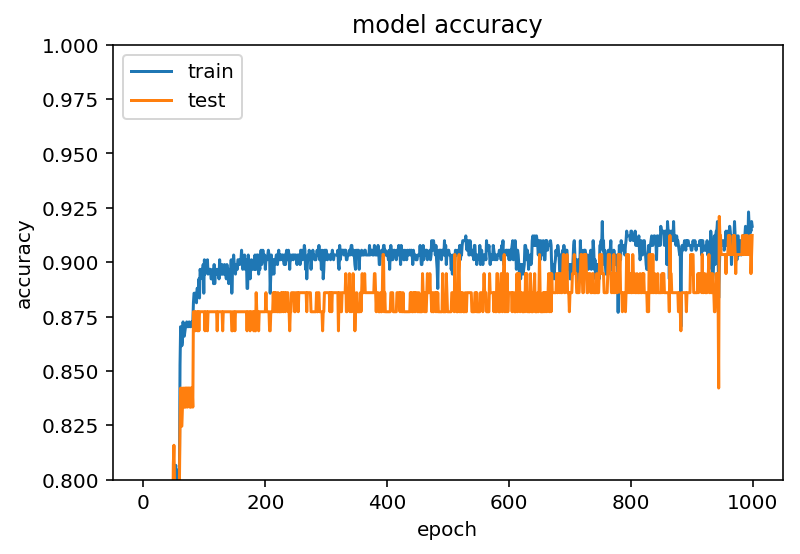

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0.8, 1.0])
plt.show()

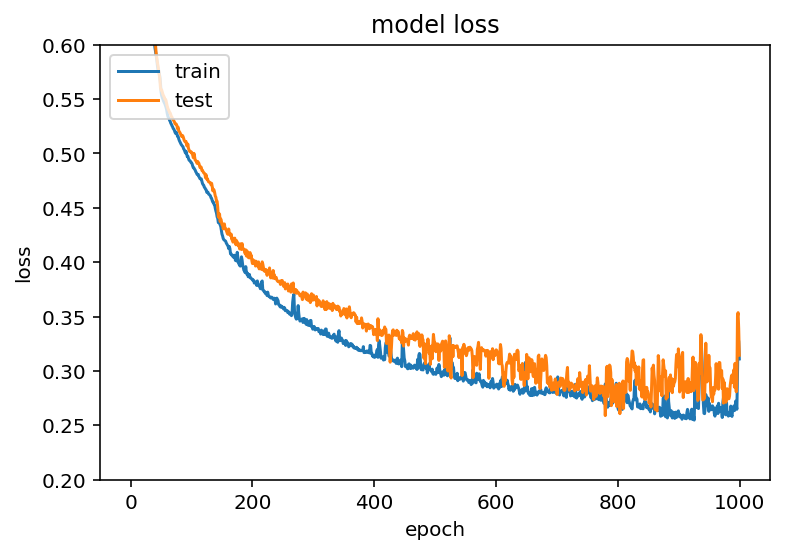

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([.2, .6])
plt.show()

In [13]:
first_layer_weight_avg = []
first_layer_bias_avg = []
first_layer_bias_not_zero = []
w1nzi = []
w1nzo = []

second_layer_weight_avg = []
second_layer_bias_avg = []
second_layer_bias_not_zero = []
w2nzi = []
w2nzo = []

for i in range(epochs):
    r = process_epoch(i)
    first_layer_weight_avg.append(np.average(r['w1']))
    first_layer_bias_avg.append(np.average(r['b1']))
    first_layer_bias_not_zero.append(r['b1nz'])
    w1nzi.append(r['w1nzi'])
    w1nzo.append(r['w1nzo'])
    
    second_layer_weight_avg.append(np.average(r['w2']))
    second_layer_bias_avg.append(np.average(r['b2']))
    second_layer_bias_not_zero.append(r['b2nz'])
    w2nzi.append(r['w2nzi'])
    w2nzo.append(r['w2nzo'])

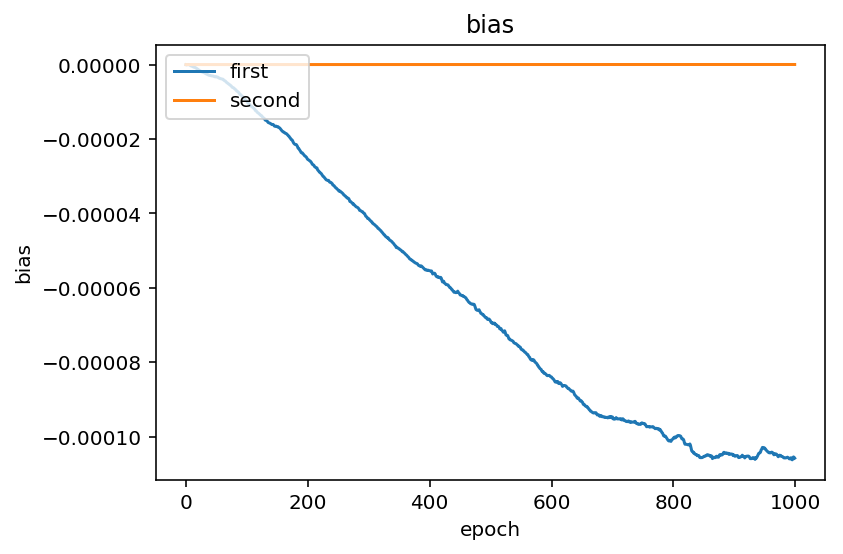

In [14]:
plt.plot(first_layer_bias_avg)
plt.plot(second_layer_bias_avg)
plt.title('bias')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['first', 'second'], loc='upper left')
# plt.ylim([-3e-9, 6e-9])
# plt.ylim([, 6e-9])
plt.show()

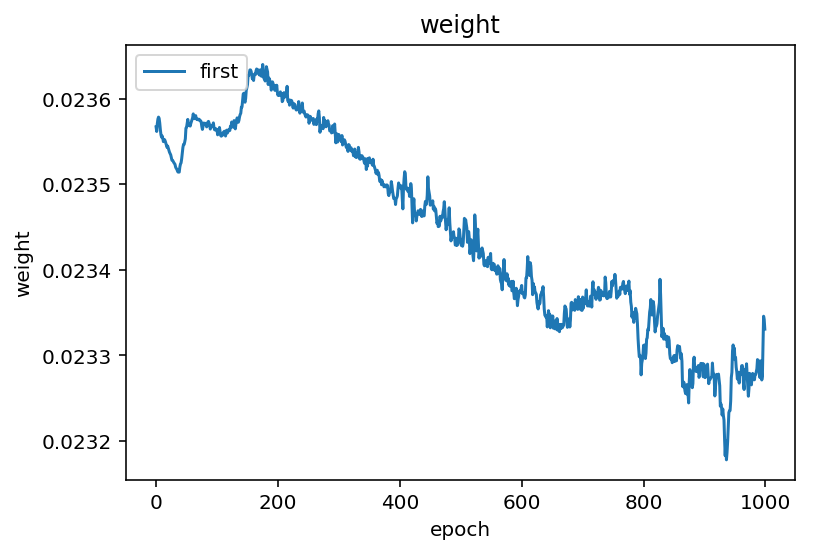

In [15]:
plt.plot(first_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['first'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

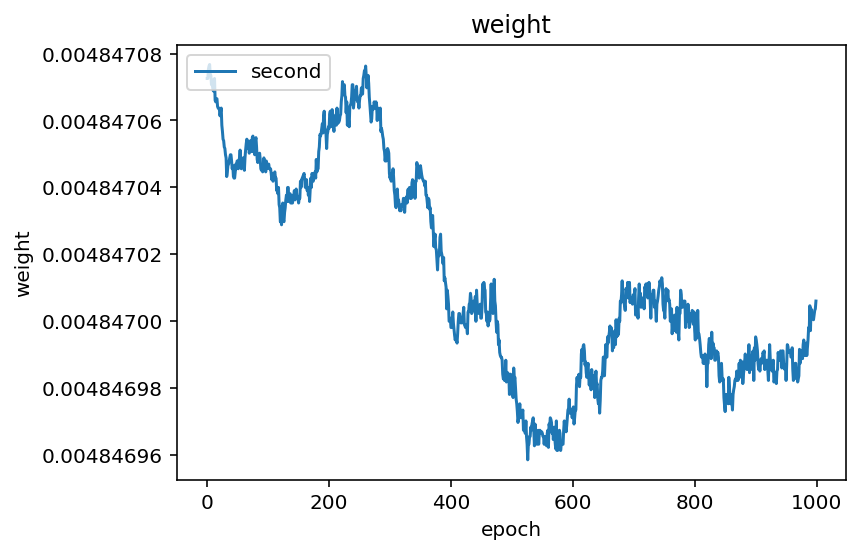

In [16]:
plt.plot(second_layer_weight_avg)
plt.title('weight')
plt.ylabel('weight')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

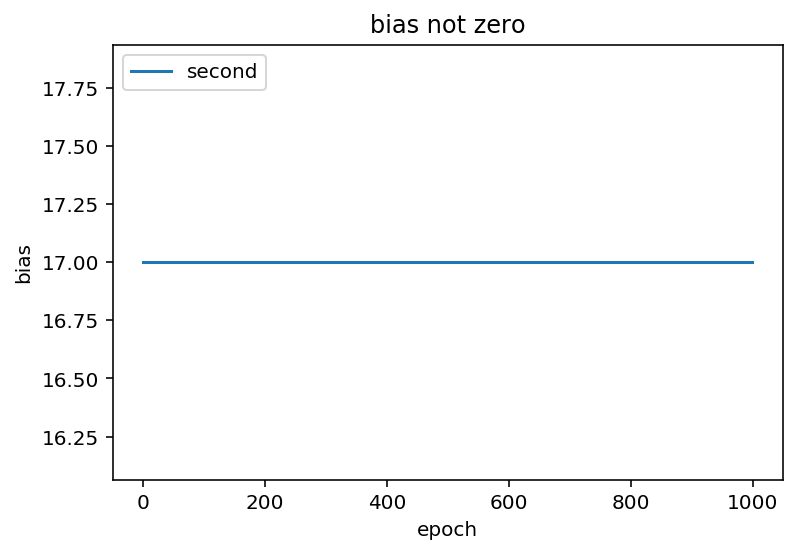

In [17]:
plt.plot(first_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

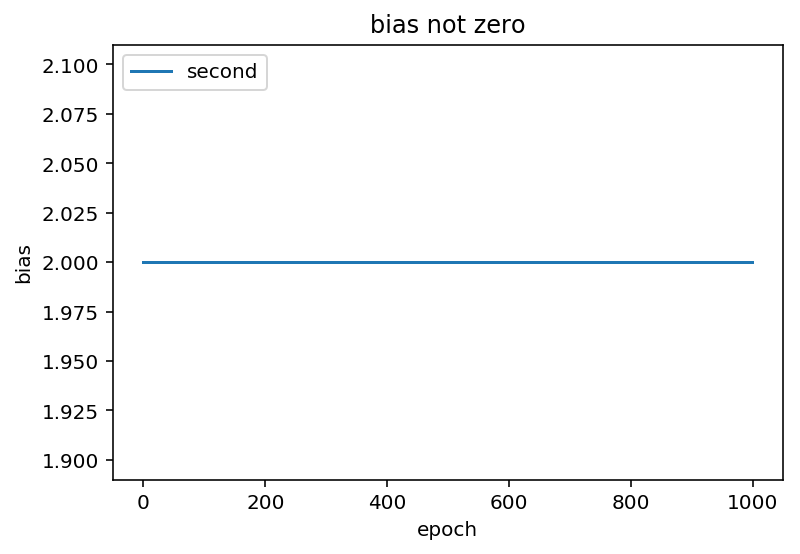

In [18]:
plt.plot(second_layer_bias_not_zero)
plt.title('bias not zero')
plt.ylabel('bias')
plt.xlabel('epoch')
plt.legend(['second'], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

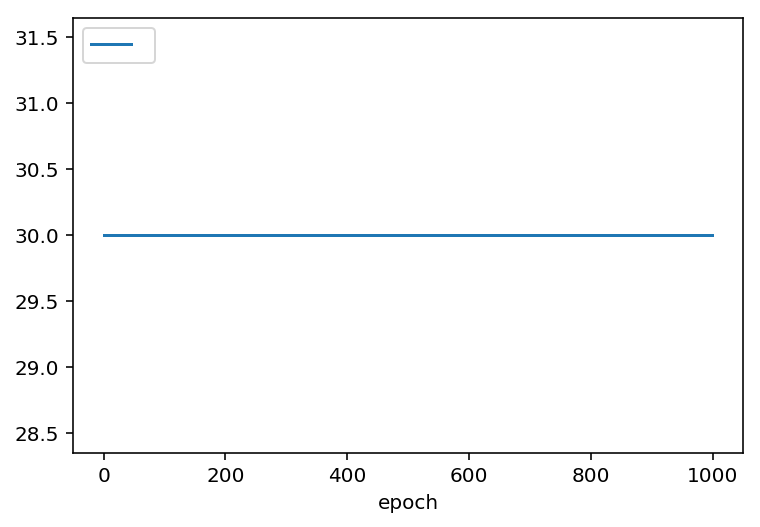

In [19]:
plt.plot(w1nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

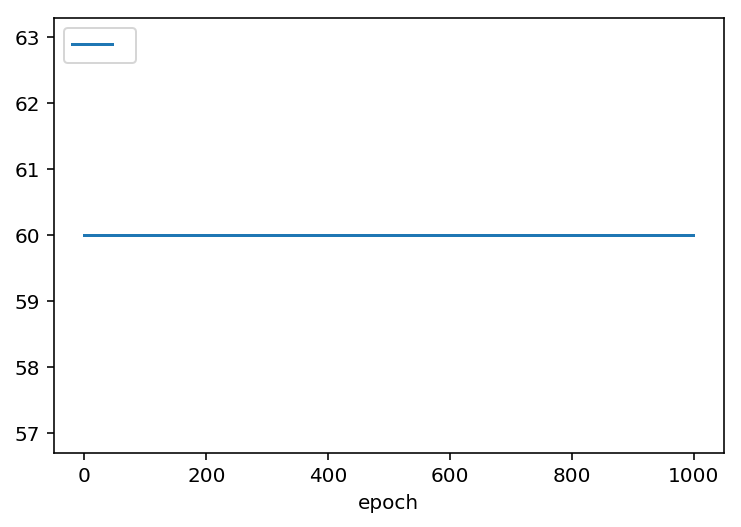

In [20]:
plt.plot(w1nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

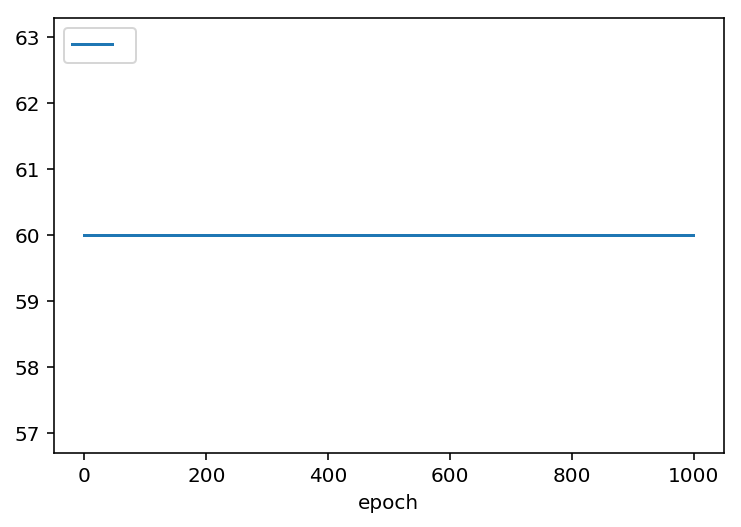

In [21]:
plt.plot(w2nzi)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()

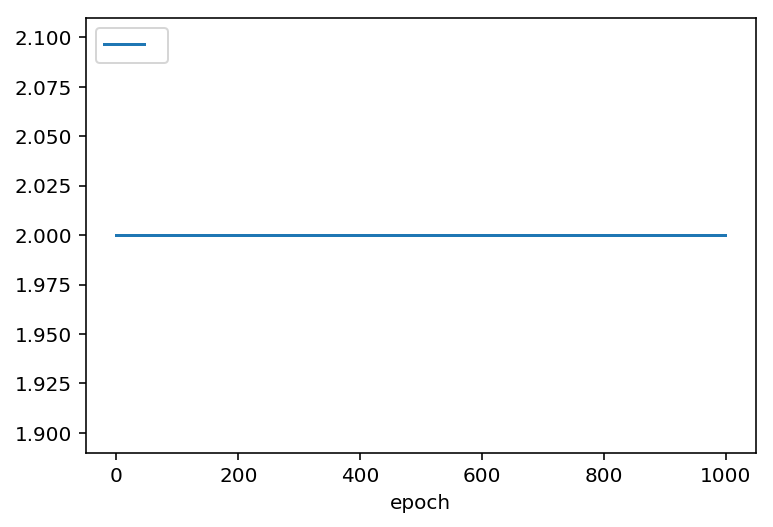

In [22]:
plt.plot(w2nzo)
plt.title('')
plt.ylabel('')
plt.xlabel('epoch')
plt.legend([''], loc='upper left')
# plt.ylim([-1e-7, 3e-7])
plt.show()